In [1]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, utils
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index = datasets.reuters.get_word_index()

In [6]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [7]:
train_labels[10]

3

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
# Keras have built in metods for one hot encoding
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2025-06-03 23:45:53.891057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2025-06-03 23:45:53.891293: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
16/16 [==============================] - 0s 16ms/step - loss: 2.6249 - accuracy: 0.5231 - val_loss: 1.7659 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4429 - accuracy: 0.7016 - val_loss: 1.3268 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0641 - accuracy: 0.7690 - val_loss: 1.1389 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8350 - accuracy: 0.8211 - val_loss: 1.0463 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6680 - accuracy: 0.8566 - val_loss: 0.9564 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5344 - accuracy: 0.8846 - val_loss: 0.9236 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4326 - accuracy: 0.9077 - val_loss: 0.8893 - val_accuracy: 0.8170
Epoch 8/20
16/

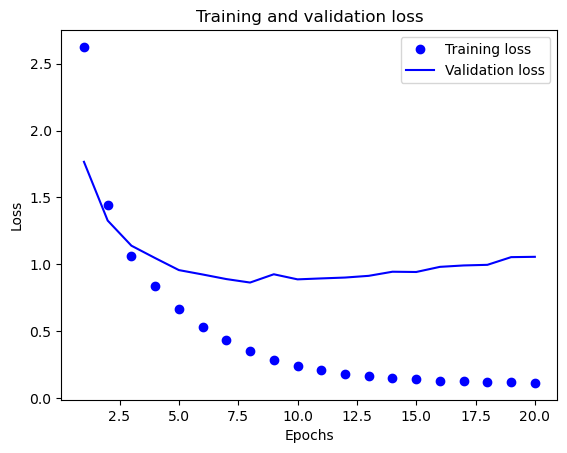

In [16]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

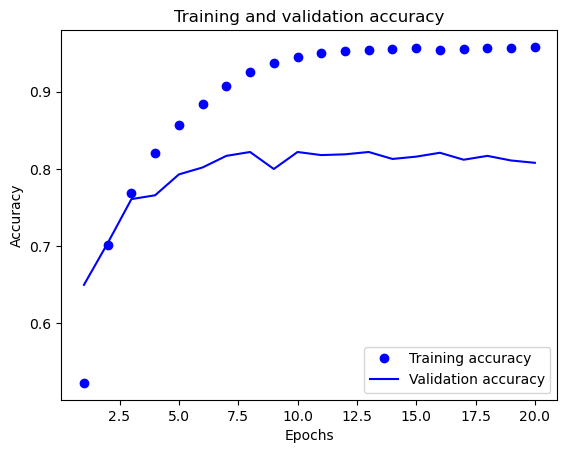

In [17]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/9
18/18 [==============================] - 0s 8ms/step - loss: 2.4745 - accuracy: 0.5563
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3463 - accuracy: 0.7172
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9984 - accuracy: 0.7848
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7702 - accuracy: 0.8352
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6052 - accuracy: 0.8729
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4761 - accuracy: 0.9015
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3839 - accuracy: 0.9176
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3081 - accuracy: 0.9338
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9891 - accuracy: 0.7832


In [19]:
results

[0.989115834236145, 0.7831701040267944]

In [20]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17853962600178094

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0000001

In [24]:
np.argmax(predictions[0])

3

In [25]:
y_train = np.array(train_labels)
x_test = np.array(test_labels)

# Experienemnt with model with two low dimension

In [26]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 2.8452 - accuracy: 0.3676 - val_loss: 2.1443 - val_accuracy: 0.4200
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 1.7577 - accuracy: 0.5744 - val_loss: 1.5823 - val_accuracy: 0.6270
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3882 - accuracy: 0.6447 - val_loss: 1.4475 - val_accuracy: 0.6370
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2016 - accuracy: 0.6858 - val_loss: 1.3585 - val_accuracy: 0.6650
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0656 - accuracy: 0.7248 - val_loss: 1.3102 - val_accuracy: 0.6870
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9558 - accuracy: 0.7532 - val_loss: 1.2793 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8663 - accuracy: 0.7784 - val_loss: 1.2850 - val_accuracy: 0.7040
Epoch 8/20
63/63 [==